In [ ]:
######################################################
#Accept a search term from the user and download
#the last 100 tweets for that search terms
######################################################

#install the python twitter module we can do this
#using !pip install python-twitter
#this is a module that provides like interface to the twitter API.
#the twitter api is Rest api which parses in json


!pip install python-twitter



In [ ]:
import twitter
#importing twitter means we are taking python-twitter module
#The module provides an api object which has methods to get information from the twitter api.
#the api object will need your twitter api key/access credentials etc
consumer_key=''
consumer_secret=''
access_token_key=''
access_token_secret=''
api=twitter.Api(consumer_key,consumer_secret,access_token_key,access_token_secret)
#now we are set

print(api.VerifyCredentials())

In [95]:
#now we will setup a function now to accept a 
#particular search term and then fetch its corresponding tweets
def createTestData(search_string):
    try:
        tweets_fetched=api.GetSearch(search_string,count=100)
        #api.GetSearch()is used for searching a particular term
        #and count is the no. of tweets that needs to be fetched
        #the full documentation can be found at pydoc twitter.status
        print ("Great! We fetched - "+str(len(tweets_fetched))+" tweets with the term "+search_string+"!!")

        #we will fetch only the text for each of the tweets and since these
        #don't have any lables we will keep it empty
        return([{"text":status.text,"label":None} for status in tweets_fetched])
    except:
        print("sorry there was an error")
        return (None)
search_string=input("Hi! there  what are you searching for today? ")
testData=createTestData(search_string)


Hi! there  what are you searching for today? Google
Great! We fetched - 100 tweets with the term Google!!


In [96]:
testData[0:9]

[{'label': None,
  'text': 'anyone else google #bts ? I’m wondering why the @BBMAs crowd went crazy when the camera cut to @BTS_twt 😂 I’m showing my age #boyband #BBMAs'},
 {'label': None,
  'text': "Has anyone else noticed how it's harder to find old headlines from right-leaning websites via Google searches than… https://t.co/fSBXJZ16i8"},
 {'label': None,
  'text': '【Google Play ギフトカードコラボ】\nついに明日より、ガルパ1周年を記念したコラボキャンペーンが開始となります✨\nステッカー3枚が付いた、ガルパ特別デザインパッケージを発売！\n全国のローソンで販売いたします💕ぜひゲットし… https://t.co/4dvqZ2AAbp'},
 {'label': None,
  'text': 'RT @Benioff: Salesforce is thrilled to partner with Google to work hand-in-hand to integrate Salesforce Marketing Cloud with @googleanalyti…'},
 {'label': None,
  'text': 'Google’s “Don’t Be Evil” No Longer Prefaces Code of Conduct  https://t.co/pncqN7YxFr'},
 {'label': None,
  'text': 'GRAPHICALCOIN (200 GC) AIRDROP Token (100 GC TOKENS PER REFERRAL) ROUND 2 #airdrop #bounty #BTC #xrp #freetoken… https://t.co/5LKbtUBMrs'},
 {'label': None,
  'text':

In [ ]:
###############################################
#Step-2:Classify each of the 100 tweets as positive and negetive
###############################################

#Download a corpus of tweets to use as training data
#we will use niek sander's tweet sentiment corpus
#it has 5000+ tweet analysis
#we can download a csv from his website with this tweet.
#but there is  a catch .Twitter only allows sharing of tweet_id's
#so we will have to take the tweet_id s and find the corresponding test to that id
#we will write a function to read the csv that we got
#from his website for each tweet id in the csv we will download tweet text and then write it back in another csv
def createTrainingCorpus(corpusFile,tweetDataFile):
    import csv
    corpus=[]
    with open(corpusFile,'rb') as csvfile:
        linereader=csv.reader(csvfile,delimiter=',',quotechar="\"")
        for row in lineReader:
            corpus.append({"tweet_id":row[2],"label":row[1],"topic":row[0]})
    #we now have alist with a dictionary for each row in sander's csv
    #next lets iterate through that list ,if you try to download more than 180 tweets/hr ,twitter will rate limit you
    #so use a delay to avoid being rate limited.but this means it will take 40+ hours to download all 5000 tweets
    #we will show you the code to download 5000 tweets,but for now
    #we will work with a smaller corpus
    #so we wont have to wait for 40 hours
    #to download full corpus
    import time
    rate_time=180
    sleep_time=3600/180
    trainingData=[]
    for tweet in corpus:
        try:
            status=api.GetStatus(tweet["tweet_id"])
            #return a twitter.status object that is the text
            print ("Tweet fetched: "+status.text)
            tweet["text"]=status.text
            #tweet is a dictionary which already has tweet_id and label(positive/negetive/neutral)
            #add another attribute now,the tweet text 
            trainingData.append(tweet)
            time.sleep(sleep_time)#to avoid rate limit
        except:
            continue
    #once the tweets are downloaded write them to a csv,so you wont have to wait for 40 hours
    #everytime you run this code
    with open(tweetDataFile,'wb')as csvfile:
        linewriter=csv.writer(csvfile,delimeter=',',quotechar="\"")
        for tweet in trainingData:
            linewriter.writerow(['tweet_id'],tweet['label'],tweet['topic'])
    return trainingData

In [97]:
def createLimitedTrainingCorpus(corpusFile,tweetDataFile):
    import csv
    corpus=[]
    with open(corpusFile,'r') as csvfile:
        lineReader = csv.reader(csvfile,delimiter=',',quotechar="\"")
        for row in lineReader:
            corpus.append({"tweet_id":row[2],"label":row[1],"topic":row[0]})
    # We now have a list with a dictionary for each row in Sanders's csv
    # Next let's iterate through that list and fetch the text for each tweet_id
    
    # If you try to download more than 180 tweets/15 min, Twitter will rate limit you. So, use a delay
    # to avoid being rate limited. But this means it will take 10+ hours to download all 5000 tweets 
    # We'll show you the code to download all 5000 tweets, but for now, we'll work with a smaller corpus
    # so we won't have to wait 10 hours to see our code run :) 
    
    # To download the full corpus 
    
    trainingData=[]
    for label in ["positive","negative"]:
        i=1
        for tweet in corpus:
            if tweet["label"]==label and i<=50:
                try:
                    status=api.GetStatus(tweet["tweet_id"])
                    #Returns a twitter.Status object 
                    print ("Tweet fetched " + status.text)
                    tweet["text"]=status.text
                    #tweet is a dictionary which already has tweet_id and label (positive/negative/neutral)
                    # Add another attribute now, the tweet text 
                    trainingData.append(tweet)
                    i=i+1
                except Exception as e: 
                    print (e)
                    
    # Once the tweets are downloaded write them to a csv, so you won't have to wait 10 hours 
    # every time you run this code :) 
    with open(tweetDataFile,'w') as csvfile:
        linewriter=csv.writer(csvfile,delimiter=',',quotechar="\"")
        # We'll add a try catch block here so that we still get the training data even if the write 
        # fails 
        for tweet in trainingData:
            try:
                linewriter.writerow([tweet["tweet_id"],tweet["text"],tweet["label"],tweet["topic"]])
            except Exception as e:
                print (e)
    return trainingData

corpusFile="/Users/gourabkonar/Untitled Folder/corpus.csv"
tweetDataFile="/Users/gourabkonar/Untitled Folder/tweetDataFile.csv"

trainingData=createLimitedTrainingCorpus(corpusFile,tweetDataFile)

Tweet fetched Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
Tweet fetched Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
Tweet fetched @RIM you made it too easy for me to switch to @Apple iPhone. See ya!
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
Tweet fetched The 16 strangest things Siri has said so far. I am SOOO glad that @Apple gave Siri a sense of humor! http://t.co/TWAeUDBp via @HappyPlace
Tweet fetched Great up close & personal event @Apple tonight in Regent St store!
Tweet fetched From which companies do you experience the best customer service aside from @zappos and @apple?
Tweet fetched Just apply for a job at @Apple, hope they call me lol
[{'code': 144, 'message': 'No status found with that ID.'}]
Tweet f

Tweet fetched The one #iphone feature still missing since @apple first showed it.. Contacts pictures on the contacts list! Simple yet 5 major updates miss
Tweet fetched Asked siri is she dreams of electric sleep. Was disappointed that she didn't have a snippy answer.  Missed opportunity @apple
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
Tweet fetched FUCK YOU @apple DIE IN A FUCKING BLAZE INFERNO.
Tweet fetched Oh, @apple. Steve obviously had nothing to do with iPhoto, as it's the perfect opposite of 'insanely great'. Get it fixed, please.
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
Tweet fetched shit, shit, shit. IOS5 u

In [98]:
####################PREPROCESSING OF DATA#################################
# In[20]:

# 2b. A class to preprocess all the tweets, both test and training
# We will use regular expressions and NLTK for preprocessing 
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
class PreProcessTweets:
    def __init__(self):
        self._stopwords=set(stopwords.words('english')+list(punctuation)+['AT_USER','URL'])
        
    def processTweets(self,list_of_tweets):
        # The list of tweets is a list of dictionaries which should have the keys, "text" and "label"
        processedTweets=[]
        # This list will be a list of tuples. Each tuple is a tweet which is a list of words and its label
        for tweet in list_of_tweets:
            processedTweets.append((self._processTweet(tweet["text"]),tweet["label"]))
        return processedTweets
    
    def _processTweet(self,tweet):
        # 1. Convert to lower case
        tweet=tweet.lower()
        # 2. Replace links with the word URL 
        tweet=re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)     
        # 3. Replace @username with "AT_USER"
        tweet=re.sub('@[^\s]+','AT_USER',tweet)
        # 4. Replace #word with word 
        tweet=re.sub(r'#([^\s]+)',r'\1',tweet)
        # You can do further cleanup as well if you like, replace 
        # repetitions of characters, for ex: change "huuuuungry" to "hungry"
        # We'll leave that as an exercise for you on regular expressions
        tweet=word_tokenize(tweet)
        # This tokenizes the tweet into a list of words 
        # Let's now return this list minus any stopwords 
        return [word for word in tweet if word not in self._stopwords]
    
tweetProcessor=PreProcessTweets()
ppTrainingData=tweetProcessor.processTweets(trainingData)
ppTestData=tweetProcessor.processTweets(testData)

            

    
ppTrainingData[:9]  



[(['get', 'swype', 'iphone', 'crack', 'iphone'], 'positive'),
 (['hilarious',
   'video',
   'guy',
   'duet',
   "'s",
   'siri',
   'pretty',
   'much',
   'sums',
   'love',
   'affair'],
  'positive'),
 (['made', 'easy', 'switch', 'iphone', 'see', 'ya'], 'positive'),
 (['16',
   'strangest',
   'things',
   'siri',
   'said',
   'far',
   'sooo',
   'glad',
   'gave',
   'siri',
   'sense',
   'humor',
   'via'],
  'positive'),
 (['great', 'close', 'personal', 'event', 'tonight', 'regent', 'st', 'store'],
  'positive'),
 (['companies', 'experience', 'best', 'customer', 'service', 'aside'],
  'positive'),
 (['apply', 'job', 'hope', 'call', 'lol'], 'positive'),
 (['lmao',
   'think',
   'onto',
   'something',
   'magical',
   'dying',
   'haha',
   'siri',
   'suggested',
   'find',
   'whores',
   'hide',
   'body',
   'lolol'],
  'positive'),
 (['rt',
   'registered',
   'developer',
   '...',
   "'s",
   'hoping',
   'actually',
   '...',
   'help',
   'greatly',
   'appreciated'

In [99]:
#2C
#Extract features and train your classifier

#We will use two methods Naive Bayes and Support vector machines

# We'll use two methods - Naive Bayes and Support Vector Machines 

import nltk 
# Naive Bayes Classifier - We'll use NLTK's built in classifier to perform the classification

# First build a vocabulary 
def buildVocabulary(ppTrainingData):
    all_words=[]
    for (words,sentiment) in ppTrainingData:
        all_words.extend(words)
    # This will give us a list in which all the words in all the tweets are present
    # These have to be de-duped. Each word occurs in this list as many times as it 
    # appears in the corpus 
    wordlist=nltk.FreqDist(all_words)
    # This will create a dictionary with each word and its frequency
    word_features=wordlist.keys()
    # This will return the unique list of words in the corpus 
    return word_features

# NLTK has an apply_features function that takes in a user-defined function to extract features 
# from training data. We want to define our extract features function to take each tweet in 
# The training data and represent it with the presence or absence of a word in the vocabulary 

def extract_features(tweet):
    tweet_words=set(tweet)
    features={}
    for word in word_features:
        features['contains(%s)' % word]=(word in tweet_words)
        # This will give us a dictionary , with keys like 'contains word1' and 'contains word2'
        # and values as True or False 
    return features 

# Now we can extract the features and train the classifier 
word_features = buildVocabulary(ppTrainingData)
trainingFeatures=nltk.classify.apply_features(extract_features,ppTrainingData)
# apply_features will take the extract_features function we defined above, and apply it it 
# each element of ppTrainingData. It automatically identifies that each of those elements 
# is actually a tuple , so it takes the first element of the tuple to be the text and 
# second element to be the label, and applies the function only on the text 

NBayesClassifier=nltk.NaiveBayesClassifier.train(trainingFeatures)
# We now have a classifier that has been trained using Naive Bayes

# Support Vector Machines 
from nltk.corpus import sentiwordnet as swn
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 

# We have to change the form of the data slightly. SKLearn has a CountVectorizer object. 
# It will take in documents and directly return a term-document matrix with the frequencies of 
# a word in the document. It builds the vocabulary by itself. We will give the trainingData 
# and the labels separately to the SVM classifier and not as tuples. 
# Another thing to take care of, if you built the Naive Bayes for more than 2 classes, 
# SVM can only classify into 2 classes - it is a binary classifier. 

svmTrainingData=[' '.join(tweet[0]) for tweet in ppTrainingData]
# Creates sentences out of the lists of words 

vectorizer=CountVectorizer(min_df=1)
X=vectorizer.fit_transform(svmTrainingData).toarray()
# We now have a term document matrix 
vocabulary=vectorizer.get_feature_names()

# Now for the twist we are adding to SVM. We'll use sentiwordnet to add some weights to these 
# features 

swn_weights=[]

for word in vocabulary:
    try:
        # Put this code in a try block as all the words may not be there in sentiwordnet (esp. Proper
        # nouns). Look for the synsets of that word in sentiwordnet 
        synset=list(swn.senti_synsets(word))
        # use the first synset only to compute the score, as this represents the most common 
        # usage of that word 
        common_meaning =synset[0]
        # If the pos_Score is greater, use that as the weight, if neg_score is greater, use -neg_score
        # as the weight 
        if common_meaning.pos_score()>common_meaning.neg_score():
            weight=common_meaning.pos_score()
        elif common_meaning.pos_score()<common_meaning.neg_score():
            weight=-common_meaning.neg_score()
        else: 
            weight=0
    except: 
        weight=0
    swn_weights.append(weight)


# Let's now multiply each array in our original matrix with these weights 
# Initialize a list

swn_X=[]
for row in X: 
    swn_X.append(np.multiply(row,np.array(swn_weights)))
# Convert the list to a numpy array 
swn_X=np.vstack(swn_X)


# We have our documents ready. Let's get the labels ready too. 
# Lets map positive to 1 and negative to 2 so that everything is nicely represented as arrays 
labels_to_array={"positive":1,"negative":2}
labels=[labels_to_array[tweet[1]] for tweet in ppTrainingData]
y=np.array(labels)

# Let's now build our SVM classifier 
from sklearn.svm import SVC 
SVMClassifier=SVC()
SVMClassifier.fit(swn_X,y)




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
#2d
# First Naive Bayes 
NBResultLabels=[NBayesClassifier.classify(extract_features(tweet[0])) for tweet in ppTestData]

# Now SVM 
SVMResultLabels=[]
for tweet in ppTestData:
    tweet_sentence=' '.join(tweet[0])
    svmFeatures=np.multiply(vectorizer.transform([tweet_sentence]).toarray(),np.array(swn_weights))
    SVMResultLabels.append(SVMClassifier.predict(svmFeatures)[0])
    # predict() returns  a list of numpy arrays, get the first element of the first array 
    # there is only 1 element and array

    





In [101]:
SVMClassifier.predict(svmFeatures)

array([2])

In [102]:
#step 3: Get the majority and print the sentiment

if NBResultLabels.count('positive')>NBResultLabels.count('negative'):
    print ("NB Result Positive Sentiment" + str(100*NBResultLabels.count('positive')/len(NBResultLabels))+"%")
else: 
    print ("NB Result Negative Sentiment" + str(100*NBResultLabels.count('negative')/len(NBResultLabels))+"%")
    
    
    
    
if SVMResultLabels.count(1)>SVMResultLabels.count(2):
    print ("SVM Result Positive Sentiment" + str(100*SVMResultLabels.count(1)/len(SVMResultLabels))+"%")
else: 
    print ("SVM Result Negative Sentiment" + str(100*SVMResultLabels.count(2)/len(SVMResultLabels))+"%")

NB Result Positive Sentiment85.0%
SVM Result Negative Sentiment96.0%


In [ ]:
NBResultLabels[0:50]

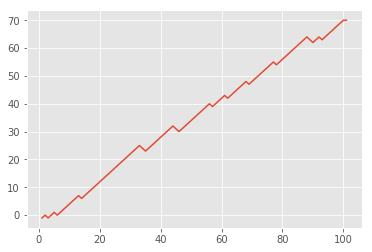

In [107]:
#plotting the graph
twitter_output_file=open('Twitter_output_file.txt','w')
for item in NBResultLabels:
    twitter_output_file.write(str(item)+"\n")
twitter_output_file.close()



#############################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter_output_file.txt","r").read()
    lines = pullData.split('\n')

    

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[0:]:
        x += 1
        if "positive" in l:
            y += 1
        elif "negative" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()